In [1]:
# 观察albumentations工具提供的图像增强效果
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
import cv2
from datasets import *
image,label, _ = makedatasets(types=['LGE','C0LGE'])

/home/lucar/anaconda3/envs/d2l/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


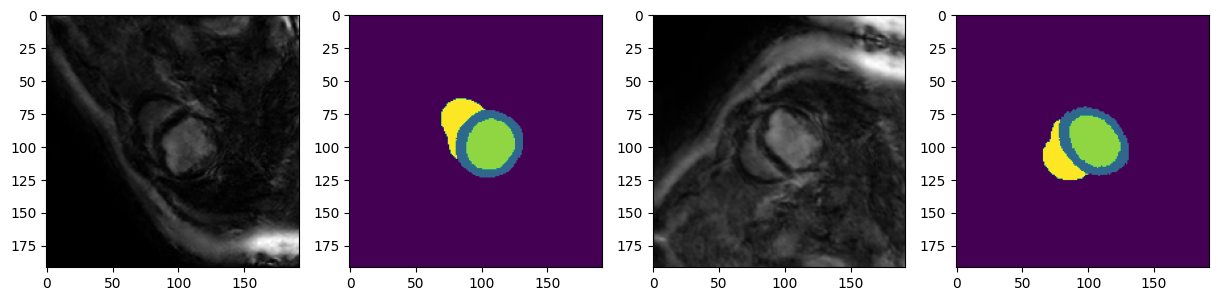

In [31]:
train_transforms = A.Compose([
            A.OneOf([
                A.ElasticTransform(alpha=100,sigma=50,alpha_affine=20,p=0.7),
                A.GridDistortion(p=0.7),
            ],p=0.8),
            A.RandomGamma(gamma_limit=(70,100),p=0.5),
            A.RandomRotate90(),
            A.VerticalFlip(),
            A.HorizontalFlip(),
            A.Transpose(),
            #A.ShiftScaleRotate(),
            #A.ElasticTransform(alpha=100,sigma=50,alpha_affine=20,p=1),
            #A.RandomRotate90(),
            #A.VerticalFlip(),
            #A.Transpose(),
            #A.OpticalDistortion(p=1,distort_limit=2, shift_limit=0.5),
            #A.GridDistortion(p=1),
            #A.RandomBrightnessContrast(p=1),
            #A.RandomGamma(gamma_limit=(70,100),p=1),
            #A.OpticalDistortion(p=1, distort_limit=1, shift_limit=0.5)
        ])
index = 60
re = train_transforms(image=image[index],mask=label[index])
ipro = re['image']
mpro = re['mask']
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image[index],cmap='gray')
plt.subplot(1,4,2)
plt.imshow(label[index])
plt.subplot(1,4,3)
plt.imshow(ipro,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mpro,)

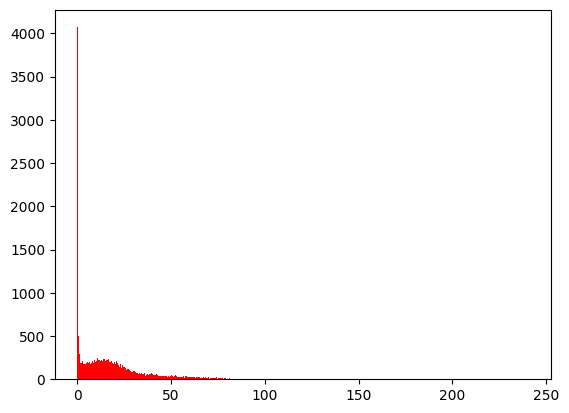

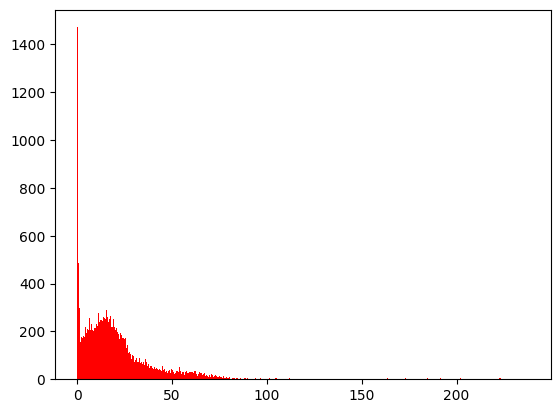

In [3]:
from utils import drawhistogram
drawhistogram(image[index])
drawhistogram(ipro)